# 09. 몬테카를로 기법 심화 및 베이지안 근사

<br>

## 09-01. 중요도 샘플링 (Importance Sampling)
- 중요도 샘플링은 임의의 함수 $h(x)$의 기대값을, 샘플링하기 어려운 분포 $f(x)$에 대해 평가할 때, 대신 샘플링하기 쉬운 대리 분포 $g(x)$에서 샘플을 추출하고, 실제 분포와 대리 분포의 비율로 가중치를 부여하여 계산하는 일반적인 방법

$$I_h = \mathrm{E}_{f(x)}[h(x)] = \int h(x) f(x) \mathrm{d}x = \int h(x) \frac{f(x)}{g(x)} g(x) \mathrm{d}x = \mathrm{E}_{g(x)}\left[h(x) \frac{f(x)}{g(x)}\right].$$

- 이에 해당하는 몬테카를로 근사는

$$I_h \approx \frac{1}{n} \sum_{i=1}^n h(x_i) \frac{f(x_i)}{g(x_i)} = \frac{1}{n} \sum_{i=1}^n h(x_i) w_i,$$

where $x_i \sim g(x)$

- 중요도 샘플링을 적용하기 위해서는, $g(x)=0$인 경우, $h(x)f(x)=0$이어야 함
- **좋은 중요도 샘플링 추정량은 당연히 분산이 낮아야 하며, 특히 그 분산이 유한해야 함**

$$\mathrm{E}_g\left[ h^2(x) \frac{f^2(x)}{g^2(x)} \right] = \int h^2(x) \frac{f^2(x)}{g(x)} \mathrm{d}x < \infty.$$

- 예를 들어, 만약 $Var_f [h(X)] < \infty$이고, 모든 $x$에 대해

$$\quad \frac{f(x)}{g(x)} \le M, \forall x\;\;(\text{fore some} M>0)$$라면, 분산이 유한해짐

<br>

## 09-02. 가능도에 의존하지 않는 추론 및 베이지안 근사 (ABC)
- MCMC와 다른 일반적인 추론 방법들은 가능도 $p(D|\theta)$를 계산할 수 있는 모델에 대해 적용가능
    이러한 모델의 범위는 넓지만, 실제 관심 있는 모든 모델을 포함하지는 않음습니다. 
    
    - 예를 들어, 계통수 모델(phylogenetic tree models)이나 확률 미분 방정식을 사용하는 일부 동적 모델(dynamical models)은 계산적으로 다루기 어려운 가능도를 포함하는데, 이 경우 매우 큰 공간에 대해 정규화 상수를 계산해야 할 수도 있음.
    
    $\rightarrow$ **가능도에 의존하지 않는, 소위 likelihood-free 추론 방법들은 새로운 합성 데이터 세트를 시뮬레이션하는 방식에 기반**
    
    많은 모델에서 이러한 시뮬레이션은 가능도를 평가하거나 정의하는 것보다 더 쉬울 수 있으며, 추론은 시뮬레이션된 합성 데이터 세트와 관측된 데이터 세트를 비교하는 방식으로 이루어짐

<br>

## 09-03. 베이지안 근사 (ABC)
- 관측값 $D$가 어떤 매개변수 $\theta$에 의존하는 모델일 때,

$$p(\mathcal{D}, \theta) = p(\mathcal{D} | \theta) p(\theta)$$

- ABC의 기본 아이디어는
    
    1. **샘플링** : 사전분포 $p(\theta)$로 부터 $\theta^*$를 샘플링
    2. **합성 데이터 생성** : $\theta^*$에 조건화하여, 새로운 관측 데이터 집합 $D^*$를 시뮬레이션
        
        즉, $D^*=\eta(\theta^*) \sim p(D|\theta^*)$
    3. **수용/거부** : 명시된 기준에 따라 샘플($\theta^*$)를 수용하거나 거부

<br>

## 09-04. 엄격한 ABC (Exact Rejection ABC)
- 엄격한 ABC에서는, 시뮬레이션된 샘플 $\theta^*$가 오직 $D^*=D$인 경우에만 수용
    
    $\rightarrow$ 이 경우, 수용된 샘플들이 사후분포 $p(\theta|D)$를 따름을 확인할 수 있음
    
    $\rightarrow$ 하지만, 데이터셋의 정확한 복제품을 시뮬레이션할 확률은 보통 매우 미미하기 때문에, 이러한 ABC는 매우 단순한 문제에만 적용 가능

<br>

## 09-05. 요약 통계량을 이용한 ABC (Summary Statistics ABC)
- ABC의 효율성을 높이기 위해, 생성된 데이터 집합과 관측 데이터 집합 사이에서 전체 데이터를 비교하는 대신,

   **일부 요약 통계량 $S(D)$만 일치하면 되는 조건을 사용**
   
       - 예) 데이터의 평균과 분산 등
   
- 요약 통계량을 사용하면 샘플링을 근사적으로 만들기 위한 간단한 완화(relaxation)을 허용
    
    즉, 어떤 $\epsilon > 0$에 대해
    
$$\| S(\mathcal{D}) - S(\mathcal{D}^*) \| < \epsilon$$인 경우 제안을 수용

- 이러한 방법은 특히 연속형 $D$와 $S(D)$인 경우 샘플링 효율성을 크게 향상시킬 수 있지만,

    **그 대가로 직접적인 사후분포가 아닌, 사후분포의 근사값을 샘플링하는 결과**

<br>

## 09-06. 베이지안 근사는 무엇으로부터 샘플링 되는가?
- $\| \mathcal{D} - \mathcal{D}^* \| < \epsilon$조건을 만족하는 샘플 수용 절차는,
    
    제안된 샘플 $\theta^*$를 다음 확률로 수용하는 절차로 일반화
    
$$a = \frac{\pi_{\epsilon}(\mathcal{D} - \mathcal{D}^*)}{c},$$

- 여기서 $\pi_\epsilon(\cdot)$은 적절한 확률 밀도함수이며, 상수 $c$는 $\frac{\pi_{\epsilon}(\mathcal{D} - \mathcal{D}^*)}{c}$가 확률로 정의되도록 선택됨

    이 수용확률을 정의한 ABC는 모델 $\mathcal{D} = \eta(\theta) + \epsilon,$의 사후분포로부터 샘플링하는 것과 동등함
    
    - 여기서 $\epsilon \sim \pi_\epsilon(\cdot)$은 $\eta(\theta)$와 독립
    
    - 따라서 0이 아닌 $\epsilon$을 사용하는 ABC는 추가 오차항을 포함환 관련 모델의 사후분포로부터 샘플링 하는 것과 동일

<br>

## 09-07. 근사 베이지안 예시
- 이항모델의 사후분포로부터 1000개의 샘플링

$$p(x | n, \pi) = \mathrm{Binomial}(x;\;n, \pi)$$

- 성공확률$\pi$에 대해 사전정보가 없다면, $n$번의 시뮬레이션 시행으로 얻은 성공률을 사전정보로 사용

$$p(\pi) = \mathrm{Uniform}(0, 1).$$

In [4]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

In [5]:
def abc_coinflip(N, n, k):
    samples = np.zeros(N)
    nsamples = 0
    
    while nsamples < N:
        p = npr.uniform()
        if npr.binomial(n, p) == k:
            samples[nsamples] = p
            nsamples += 1
            
    return samples

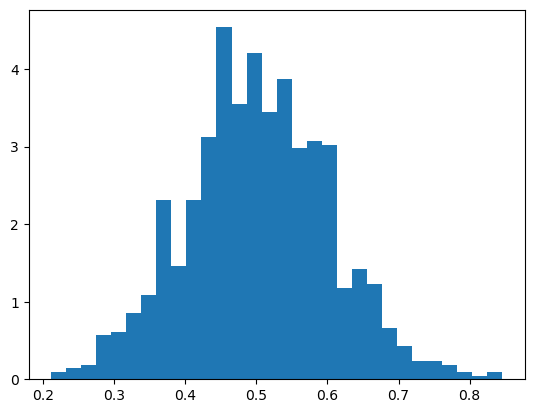

In [6]:
samples = abc_coinflip(1000, 20, 10)
h = plt.hist(samples, 30, density=True)
plt.show()

<br>

## 09-08. 추가 사항

- 요약 통계량의 일치에 약간의 여유(slack)를 허용한 후에도, 사전분포로부터의 독립적인 샘플링은 너무 비효율적일 수 있음
    
    $\rightarrow$ ABC와 어떤 형태의 MCMC를 결합하거나, 제안 샘플링 위치를 학습하는 방법들이 도움이 될 수 있음
    
<br>

- ABC는 종종 물리적 또는 화학적 시스템의 시뮬레이터(예: 전염성 병원체에 의한 전염병 시뮬레이터)와 함께 과학적 맥락에서 사용
    - ABC 접근법은 이러한 시뮬레이터에 내재된 지식을 베이지안 추론과 결합할 수 있게 도움
    
<br>

- ABC는 딥 뉴럴 네트워크를 사용하는 기계 학습 분야에서 널리 사용되는 생성적 적대 신경망(GANs)과 명확한 개념적 유사성을 가짐
    - GAN은 두 개의 신경망, 즉 생성기(generator)와 판별기(discriminator)를 결합
    - GAN 학습은 생성기가 실제 데이터와 구분할 수 없을 정도의 합성 샘플을 생성하려고 시도하고, 판별기는 이를 구별하려고 하는 게임에 기반
    - 생성된 데이터와 실제 데이터의 유사성을 기반으로 하는 ABC의 샘플링은 일종의 확률적 변형(probabilistic variant) GAN으로 볼 수 있음